# Math/Digital Signal Processing (DSP) refresher

## Complex Numbers
A complex number is a nubwer written in the form $z = a + bi$ where $a$ is known as the "real" part and $bi$ is the "imaginary part.  The imaginary unit $i$ is defined as $i = \sqrt{-1}$.  Typically in electrical engineers use $i$ to represent current, so you will often see engineers use $j$ as a substitue for $i$ i.e) $j = i = \sqrt{-1}$.  I'm an electrical engineer so I'm going to force you to use $j$ >:)

### Addition
Given two complex numbers $z_1 = a + bj$ and $z_2 = c + dj$, their sum and difference is found by adding/subtracting their real and imaginary parts seperately:

$$z_1 + z_2 = (a + c) + (b + d)j$$
$$z_1 - z_2 = (a - c) + (b - d)j$$

### Multiplication
#### Scalar multiplication
When multiplying a complex number $z = a + bj$ by a real number $\lambda$ the scalar is multiplied to both real and imaginary parts:
$$\lambda z = \lambda a + \lambda b j$$

#### Complex multiplication
Given two complex numbers $z_1 = a + bj$ and $z_2 = c + dj$, the method for multiplication is using FOIL:
$$z_1 z_2 = (a + bj)(c + dj) $$
$$z_1 z_2 = (ac - bd) + (ad + bc)j $$

### Division
Given two complex numbers $z_1 = a + bj$ and $z_2 = c + dj$, division is defined as:
$$\frac{z_1}{z_2} = \frac{a + bj}{c + dj}$$
$$\frac{z_1}{z_2} = \left(\frac{ac + bd}{c^2 + d^2}\right) +  \left(\frac{bc - ad}{c^2 + d^2}\right)j$$

### Inverse (reciprical)
The inverse of a complex number $z = a + bj$  is denoted by $z^{-1}$:
$$z^{-1} = \frac{1}{a + bj}$$
$$z^{-1} = \left(\frac{a}{a^2 + b^2}\right) - \left(\frac{b}{a^2 + b^2}\right)j$$

### Conjugate
The complex conjugate of a number $z = a + bj$ is defined as:
$$z^{*} = a - bj$$  

You will sometimes see conjugation denoted by $\bar{z}$.  Geometrically speaking, conjugation is simply the reflection around the real axis.  

For any complex number $z$, an important product $z\cdot z^*$ is:
$$z\cdot z^* = a^2 + b^2$$
It's important to note that this quantity will always be real

### Magnitude   
The magnitude of a complex number $z = a + bj$ is defined as:
$$|z| = \sqrt{a^2 + b^2}$$  
Geometrically you can think of this as the distance from the origin to the coordinate represented by the complex number  

### Argument  
The argument of a complex number $z = a + bj$ is defined as:
$$\arg{z} = \tan^{-1}{\left(\frac{b}{a}\right)}$$

This is referred to as the phase of a complex number.  Geometrically speaking, the phase of a complex number is the angle between the coordinate represented by the complex number and the real axis
### Polar form
Complex numbers are often represented in polar coordinates as:
$$z = r(\cos{\theta} + j\sin{\theta})$$
where $r$ = $|z|$ and $\theta = \arg{z}$.  You will often see this form denoted in a more compact form as $r\angle \theta$

### Euler's formula
Euler's formula defines the fundamental relationship between complex exponentials and triginometric functions.  Euler's formula states:
$$e^{j\theta} = \cos{\theta} + j\sin{\theta} $$  

You may ask yourself what the usefulness of this is and its power comes when performing math operations between complex numbers.  Recall that $e^{a} \cdot e^{b} = e^{a + b}$ and $\frac{e^{a}}{e^{b}} = e^{a - b}$ which means if we want to multiply and divide complex numbers we don't have to do complicated math in rectangular coordinates and instead can just do addition/subtraction with exponent powers.  

## How waves are represented as complex exponentials
Waves are often represented as complex exponential form to make operations algebraicly simpler.  Let's define a wave travelling in the +x direction as:
$$u(x, t) = A\cos{\omega t - k x}$$
Where $\omega$ is the angul frequency of the wave defined as $\omega = 2\pi f$ and $k$ is the wavenumber defined as $k = \frac{2\pi}{\lambda}$.  Using euler's formula we can rewrite this as:
$$u(x, t) = Ae^{(\omega t - k x)}$$  

Note that using this definition would give us an imaginary part of $\text{Im}(u(x, t)) = A\sin{(\omega t - k x)}$.  However when working with real valued signals like the one above we will only use the real part. i.e) $\text{Re}(u(x, t))$  

NOTE: When we start dealing with propogating plane waves we will find that plane waves are solutions to the wave equation and will have a component travelling in the $\pm$ x direction which will lead to us utilizing both the real and imaginary part

## Convolution
- Definition and some examples

## Fourier transform
- Definition
- Convolution theorem
- Basic transforms
- Examples

### Challenges
- Prove the convolution theorem

## Signal sampling/resampling
Sampling is the processes of converting a continous signal in time into a discrete signal.  Mathematically for a continous time signal $x(t)$ we define sampling to a discrete sample $n$ as:
$$x[n] = x(nT_s)$$ 
Where $T_s$ is the time in seconds between samples known as the sampling peroid.  Now since we are selectivly choosing when to record a continous signal the question becomes how do we best choose the value of $T_s$ so that we correctly represent the continous signal $x(t)$?  

To answer this question we will first define how to sample a signal.  

$$ x_i(t) = \sum_{k=-\infty}^{+\infty} x(kT_s) \delta(t - kT_s)$$
Using the sifting property of $\delta$ we can re-write this as
$$x_i(t) = \sum_{k=-\infty}^{+\infty} x(t) \delta(t - kT_s)$$
$$x_i(t) = x(t)\underbrace{\sum_{k=-\infty}^{+\infty} \delta(t - kT_s)}_{\delta_{T_s}(t)}$$
We define $\delta_{T_s}(t) = \sum_{k=-\infty}^{+\infty} \delta(t - kT_s)$ to be an impulse train (sometimes referred to as a comb)

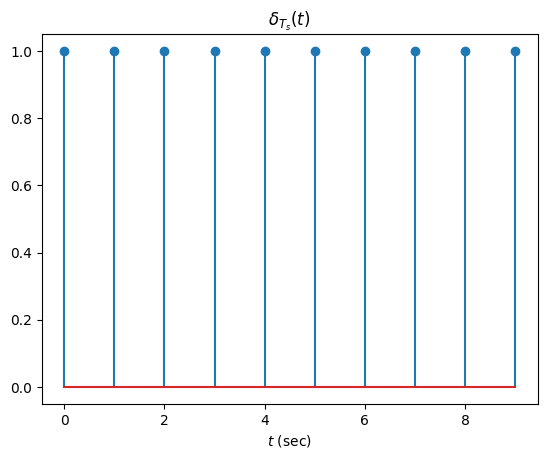

In [32]:
import matplotlib.pyplot as plt
import numpy as np
T_s = 1
N = 10
t = T_s * np.arange(N)
impulse_train = np.zeros(N)
impulse_train[::T_s] = 1

plt.figure()
plt.stem(t, impulse_train)
plt.title('$\delta_{T_s}(t)$')
plt.xlabel('$t$ (sec)')
plt.show()

Next to figure out more information about $x_i(t)$ we will look at its fourier transform $X(\omega)$

$$X_i(\omega) = \mathcal{F}\{ x(t) \delta_{T_s}(t)\}$$
Using the convolution theorem we can write this as
$$X_i(\omega) = \mathcal{F}\{ x(t) \} *  \mathcal{F}\{ \delta_{T_s}(t)\}$$
$$X_i(\omega) = X(\omega) *  \mathcal{F}\{ \delta_{T_s}(t)\}$$

Now to evaluate $\mathcal{F}\{ \delta_{T_s}(t)\}$ we will look at its fourier series since it is a truly peroid function with period $T_s$.  We'll do this to see if we can figure out a nicer representation of $\delta_{T_s}(t)$.  Recall that we can represent the fourier series of $x(t)$ as 
$$x(t) = \sum_{n=-\infty}^{\infty} c_n e^{j\omega_o n t} $$
Where
$$\omega_o = \frac{2\pi}{T_o}$$
$$c_n = \frac{1}{T_o}\int_{0}^{T_o} x(t) e^{-j\omega n t}dt$$

With that in mind we can define the fourier series of $\delta_{T_s}(t)$ as:
$$\delta_{T_s}(t) = \sum_{n=-\infty}^{\infty} c_n e^{j\omega_s n t}$$  
where $\omega_s$ is defined as the sampling frequency ($\omega_s = \frac{2\pi}{T_s})$  

To evaluate the coefficients $c_n$ for each $n$ we compute
$$c_n = \frac{1}{T_s}\int_{\frac{-T_s}{2}}^{\frac{T_s}{2}} \delta_{T_s}(t) e^{-j\omega_s n t}dt$$

Recall that over one period $\delta_{T_s}(t) = \delta(t)$ which means we can re-write the equation above as:
$$c_n = \frac{1}{T_s}\int_{\frac{-T_s}{2}}^{\frac{T_s}{2}} \delta(t) e^{-j\omega_s n t}dt$$

For now I'll skip the details but it can be shown that:
$$c_n = \frac{1}{T_s}\int_{\frac{-T_s}{2}}^{\frac{T_s}{2}} \delta(t) e^{-j\omega_s n t}dt = \frac{1}{T_s}$$

plugging our value for the fourier series coefficients back into the fourier series representation fo $\delta_{T_s}(t)$ we see:
$$\delta_{T_s}(t) = \sum_{n=-\infty}^{\infty} c_n e^{j\omega_s n t} = \sum_{n=-\infty}^{\infty} (\frac{1}{T_s}) e^{j\omega_s n t} = \frac{1}{T_s}\sum_{n=-\infty}^{\infty} e^{j\omega_s n t}$$  

Remember we're interested in the fourier trasnform of $\delta_{T_s}(t)$ and we just derived a representation of the function using its fourier series.  Now to compute the transform we have
$$\mathcal{F}\{ \delta_{T_s}(t) \} = \mathcal{F}\{ \frac{1}{T_s}\sum_{n=-\infty}^{\infty} e^{j\omega_s n t}\} = \frac{1}{T_s}\sum_{n=-\infty}^{\infty} \mathcal{F}\{ e^{j\omega_s n t} \}$$
Using fourier transform tables we see that
$$\mathcal{F}\{ \delta_{T_s}(t) \} = \frac{1}{T_s}\sum_{n=-\infty}^{\infty} 2\pi \delta(\omega - n\omega_s)$$  

Recall we were trying to evaluate $X_i(\omega) = X(\omega) *  \mathcal{F}\{ \delta_{T_s}(t)\}$.  Now that we have an expression for $\mathcal{F}\{ \delta_{T_s}(t)\}$ we'll plug it back into the original equation:

$$X_i(\omega) = X(\omega) *  \mathcal{F}\{ \delta_{T_s}(t)\} = X(\omega) * \frac{1}{T_s}\sum_{n=-\infty}^{\infty} 2\pi \delta(\omega - n\omega_s)$$

By linearity of convolution we can re-write this as:
$$X_i(\omega) =  \frac{1}{T_s} \sum_{n=-\infty}^{\infty} X(\omega) *  2\pi \delta(\omega - n\omega_s)$$
now using the sifting property of $\delta$
$$X_i(\omega) =  \frac{1}{T_s} \sum_{n=-\infty}^{\infty} X(\omega - n\omega_s) $$

This means the spectrum of our sampled interpolation of $x(t)$ is the spectrum of our continous signal $X(\omega)$ with a copy of it centered around $n\omega_s$


[-40, -30, -20, -10, 0, 10, 20, 30, 40]


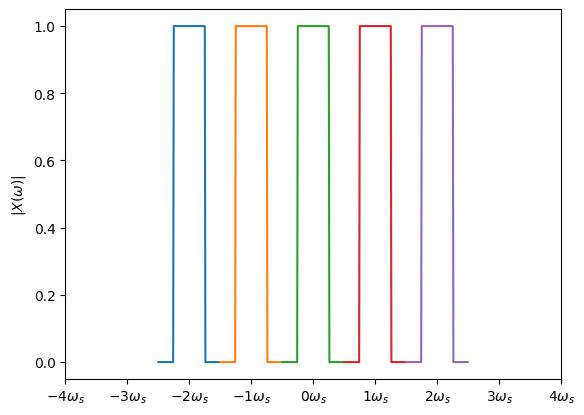

In [152]:
#TODO: This plot sucks plz make it better
import numpy as np
import matplotlib.pyplot as plt
def rect(x, bw):
    return np.where(np.abs(x) <= bw/2, 1, 0)

bw = 5
w_s = 2 * bw
duration = 2
T_s = 1 /w_s
num_samples = 100
num_samp_freq = 5
x = np.zeros(num_samples)
w = w_s * num_samp_freq * np.fft.fftshift(np.fft.fftfreq(num_samp_freq * num_samples))

plt.figure()
for n in range((-num_samp_freq)//2 + 1, num_samp_freq//2+1):
    x = np.zeros(num_samples)
    w = w_s * np.fft.fftshift(np.fft.fftfreq(num_samples))
    plt.plot(w + n*w_s, rect(w, bw))

tick_vals = list(range((-num_samp_freq + 1)*w_s, num_samp_freq*w_s, w_s))
print(tick_vals)
tick_labels = [f'${int(w/10)}\omega_s$' for w in tick_vals] 

plt.ylabel('$|X(\omega)|$')
plt.xticks(tick_vals, tick_labels)
plt.show()

Now if we want to extract our original signal we just need to filter out the frequency region which our original signal occupied.  Recall that our band limited signal had bandwidth $\omega_B$ and the start of the next copy (alias) of our signal occurs at $\omega_s - \omega_B$.  What we need to do is construct an ideal low pass filter which will pass frequencies within $\omega_B$ and reject frequencies at $\omega_s - \omega_B$.  

So recall to reconstruct a band limited signal $x(t)$ with bandwidth $\omega_B$ by sampling it we need to:
1. generate $x_i(t)$ (sample the signal)
2. low pass filter the data with cutoff frequency at $\omega_B$

For this to work we require that $\omega_B < \omega_S - \omega_B \rightarrow \omega_s > 2\omega_B$.  We have just derived one of the most fundamental theorems in all of signal processing: the nyquist theorem.  As we proved above, the nyquist theorem states that Theorem — If a function $x(t)$ contains no frequencies higher than B hertz, then it can be completely determined from its ordinates at a sequence of points spaced less than $\frac{1}{2B}$ seconds apart.  

## Whittaker-shannon interpolation formula  
Using what we derived above we know that we can perfectly reconstruct a band limited signal $x(t)$ if we assume we sample the signal at the nyquist rate then to do that we need to sample the signal then low pass filter it.

$$x(t) = x_i(t) * h(t)$$
$$x(t) = \sum_{k=-\infty}^{\infty} x(kT_s)h(t - kT_s)$$

The ideal low pass filter is defined as 

$$
H(\omega) = \begin{cases}
1 & |\omega| < \omega_c,\\
0  & 0 \text{ else}
\end{cases}
$$  

To find the representation in the time domain we take the fourier transform of $H(\omega)$.  Using fourier transofrm tables we can find that this becomes:

$$h(t) = \text{sinc}\left(\frac{t}{T_s}\right)$$

Plugging this in we come to the shannon whittaker interpolation formula:
$$x(t) = \sum_{k=-\infty}^{\infty} x(kT_s)\text{sinc}\left(\frac{t - kT_s}{T_x}\right)$$

## Upsampling/downsampling
Upsampling and downsampling are techniques to change the sampling rate of an already discrete signal $x[n]$.  Note the rate conversion methods do not gain you any additional information if the signal was sampled at the nyquist rate.  They are interpolation methods to gain more samples in the signal

### Upsampling
Upsampling is where you have an existing signel $x[n]$ with sampling rate $f_s$ and you want to increase its sampling rate by an integer factor of $L$.  To upsample:
1. Between each sample of $x[n]$ insert $L-1$ zeros
2. Lowpass filter original signals spectrum

Mathematically this process can be defined as:
$$x_{\uparrow L} = x_z[n] * h[n]$$
Where $h[n]$ is the low pass filter and $x_z[n]$ is defined as:
$$
x_z[n] = \begin{cases}
x[\frac{n}{L}] & \frac{n}{L} \in \mathbb{Z},\\
0  & 0 \text{ otherwise}
\end{cases}
$$


10
40
40


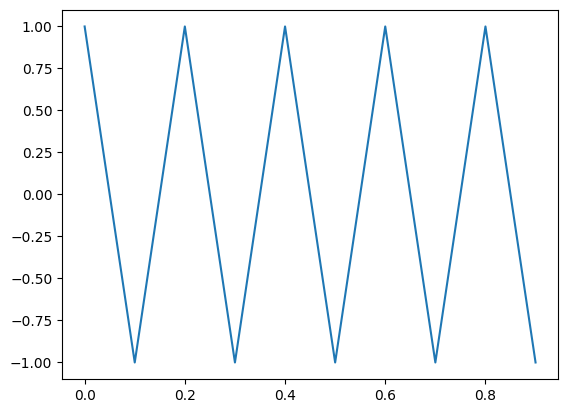

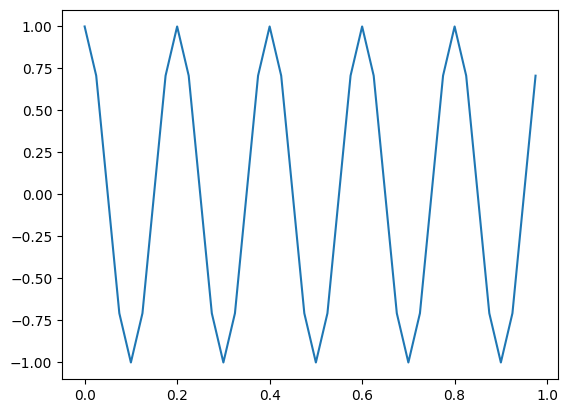

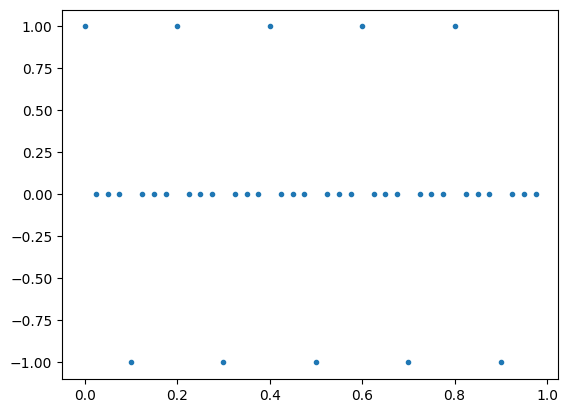

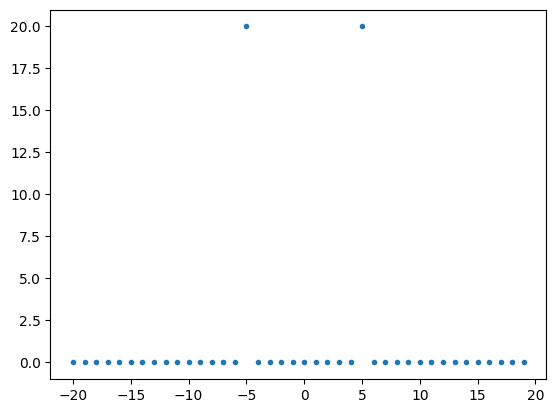

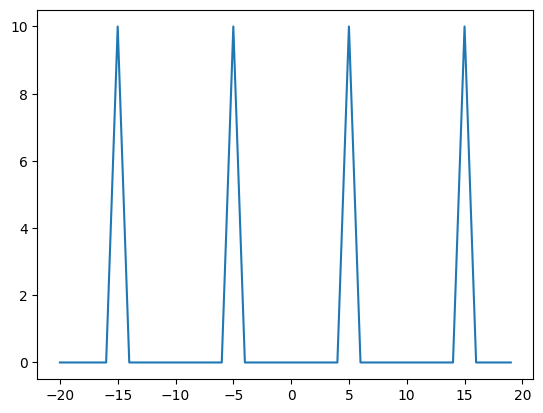

In [153]:
import matplotlib.pyplot as plt
import numpy as np

fs = 10
ts = 1/fs
duration = 1
n = fs * duration
print(n)
t = ts * np.arange(n)
x = np.cos(2 * np.pi * fs/2 * t)

plt.figure()
plt.plot(t, x)

up_factor = 4
up_fs = up_factor * fs
up_ts = 1/up_fs
n_up = up_fs * duration
t_up = up_ts * np.arange(n_up)
x_up = np.cos(2 * np.pi * fs/2 * t_up)
print(n_up)
plt.figure()
plt.plot(t_up, x_up)

y_up = np.zeros(n_up)
y_up[::up_factor] = x
print(n_up)
plt.figure()
plt.plot(t_up, y_up, '.')

w = up_fs * np.fft.fftshift(np.fft.fftfreq(n_up))
plt.figure()
plt.plot(w, np.abs(np.fft.fftshift(np.fft.fft(x_up))), '.')

y_up_fft = np.fft.fftshift(np.fft.fft(y_up))
plt.figure()
plt.plot(w, np.abs(y_up_fft))

### Downsampling
Downsampling is where you have an existing signel $x[n]$ with sampling rate $f_s$ and you want to decrease its sampling rate by an integer factor of $K$.  To downsample:
1. Lowpass filter original with cutoff frequency of lower sampling rate
1. Take only every $K$th sample from the filtered signal

Mathematically this process can be defined as:
$$x_{\downarrow K} = (x[n] * h[n])[nK]$$
Where $h[n]$ is the low pass filter

- Sampling definition
- nyquist theorem
- Upsampling via filter
- upsample via perfect filter
- downsampling via filter
- downsample via perfect filter
- rational resampling

10
40
40


array([ 5.00000000e-01-1.50219136e-17j,  3.53553391e-01+3.63577379e-18j,
        4.34897661e-17+7.37943917e-18j, -3.53553391e-01+4.03903399e-18j,
       -5.00000000e-01+3.87770477e-18j, -3.53553391e-01-1.32254241e-17j,
       -9.48938092e-18-1.14093430e-17j,  3.53553391e-01+4.36459531e-18j,
        5.00000000e-01+1.04201095e-17j,  3.53553391e-01+1.28322563e-17j,
        1.92593893e-17-9.08566964e-18j, -3.53553391e-01-1.93193331e-17j,
       -5.00000000e-01+5.00195407e-18j, -3.53553391e-01+1.81974106e-17j,
       -1.06388667e-17+1.70245956e-17j,  3.53553391e-01-5.32734780e-18j,
        5.00000000e-01-2.88311278e-17j,  3.53553391e-01-1.14960437e-17j,
       -1.41676912e-17+7.32148311e-18j, -3.53553391e-01+1.43175467e-17j,
       -5.00000000e-01+1.50219136e-17j, -3.53553391e-01-3.63577379e-18j,
       -4.34897661e-17-7.37943917e-18j,  3.53553391e-01-4.03903399e-18j,
        5.00000000e-01-3.87770477e-18j,  3.53553391e-01+1.32254241e-17j,
        9.48938092e-18+1.14093430e-17j, -3.53553391

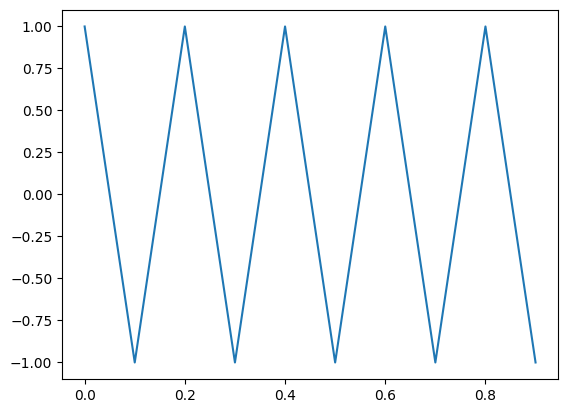

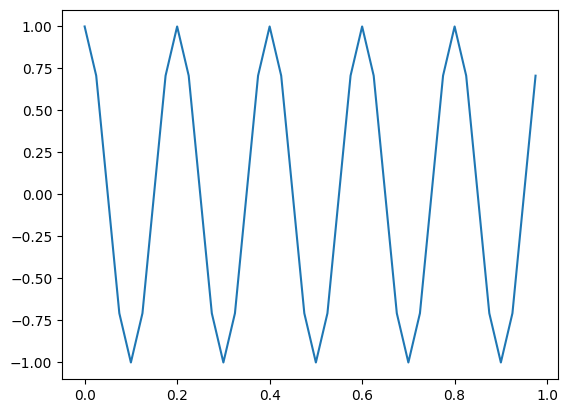

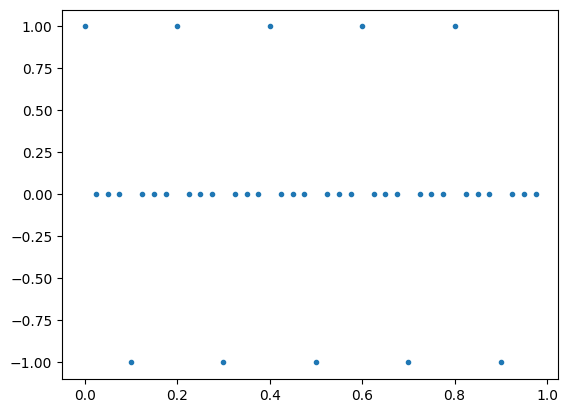

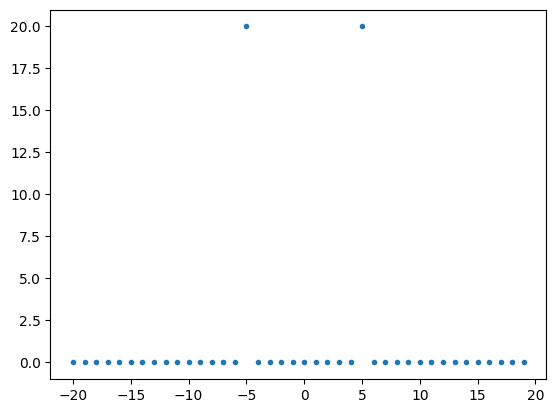

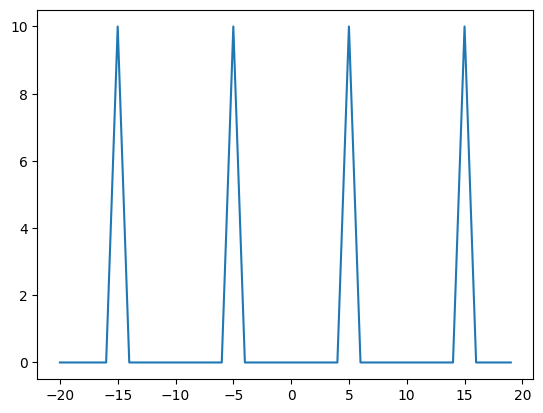

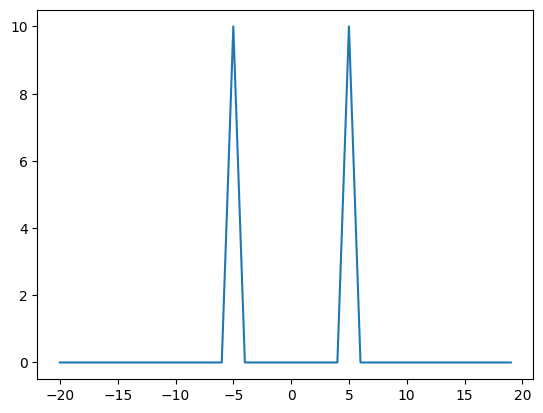

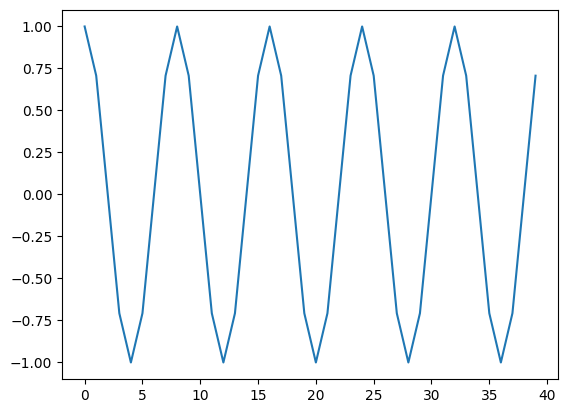

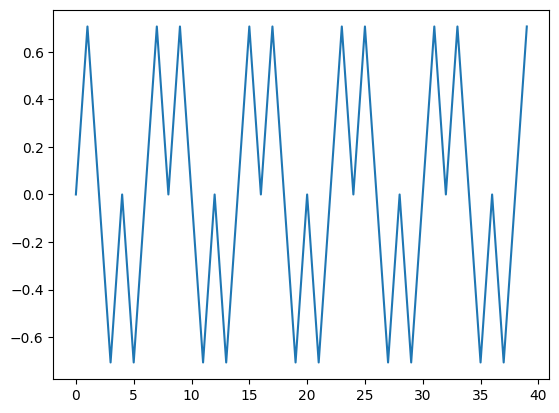

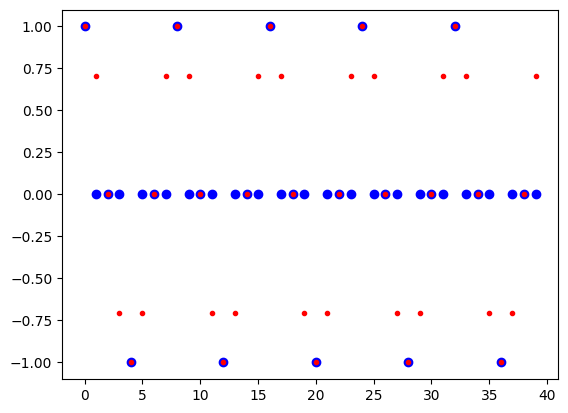

In [41]:
# import matplotlib.pyplot as plt
# import numpy as np

# fs = 10
# ts = 1/fs
# duration = 1
# n = fs * duration
# print(n)
# t = ts * np.arange(n)
# x = np.cos(2 * np.pi * fs/2 * t)

# plt.figure()
# plt.plot(t, x)

# up_factor = 4
# up_fs = up_factor * fs
# up_ts = 1/up_fs
# n_up = up_fs * duration
# t_up = up_ts * np.arange(n_up)
# x_up = np.cos(2 * np.pi * fs/2 * t_up)
# print(n_up)
# plt.figure()
# plt.plot(t_up, x_up)

# y_up = np.zeros(n_up)
# y_up[::up_factor] = x
# print(n_up)
# plt.figure()
# plt.plot(t_up, y_up, '.')

# w = up_fs * np.fft.fftshift(np.fft.fftfreq(n_up))
# plt.figure()
# plt.plot(w, np.abs(np.fft.fftshift(np.fft.fft(x_up))), '.')

# y_up_fft = np.fft.fftshift(np.fft.fft(y_up))
# plt.figure()
# plt.plot(w, np.abs(y_up_fft))


# y_up_fft[:10] = 0
# y_up_fft[30:] = 0

# plt.figure()
# plt.plot(w, np.abs(y_up_fft))

# z_up = np.fft.ifft(np.fft.ifftshift(y_up_fft))

# plt.figure()
# plt.plot(2*z_up)

# plt.figure()
# plt.plot(2*np.real(z_up) - y_up)

# plt.figure()
# plt.plot(y_up, 'bo')
# plt.plot(2*np.real(z_up), 'r.')




# z_up

## Linear time invariant (LTI) systems
- Definition
- transfer funciton definition
- example on how to invert out a trasnfer function

## Digital Filter design
- Definition
- FIR/IIR
- Basics of filters: passband, stop band, cutoff freq, ripple, ...
- Maximally flat filter (butterworth) vs chebychev
- Z transform?
- Pole/zeros?

## Windowing (apoziation)

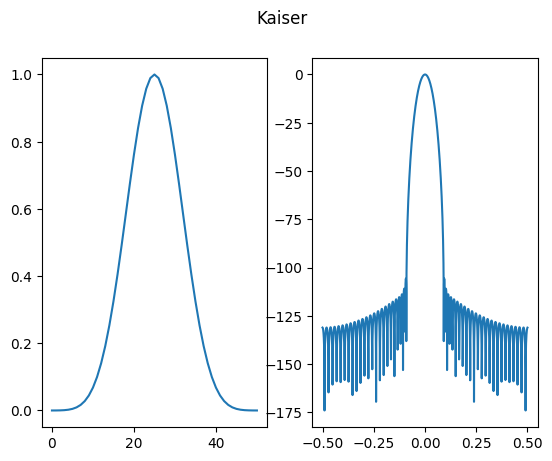

In [101]:
from scipy.signal.windows import kaiser
import matplotlib.pyplot as plt
import numpy as np
def db(x):
    return 20 * np.log10(np.abs(x))

kaiser_window = kaiser(51, beta=14)
fig, axs = plt.subplots(
    ncols=2,
)
axs = axs.flatten()
axs[0].plot(kaiser_window)

impulse_response = np.fft.fftshift(np.fft.fft(kaiser_window, n=2048))
freq = np.linspace(-0.5, 0.5, impulse_response.size)
# axs[1].plot(freq, db(impulse_response) - db(impulse_response).max())
axs[1].plot(freq, db(impulse_response) - db(impulse_response).max())
fig.suptitle('Kaiser')
plt.show()

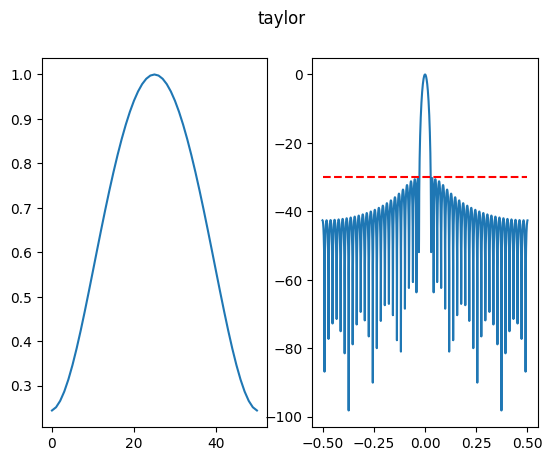

In [25]:
from scipy.signal.windows import taylor
import matplotlib.pyplot as plt
import numpy as np
def db(x):
    return 20 * np.log10(np.abs(x))

sidelobe_level = 30
taylor_window = taylor(51, nbar=4, sll=sidelobe_level)
fig, axs = plt.subplots(
    ncols=2,
)
axs = axs.flatten()
axs[0].plot(taylor_window)

impulse_response = np.fft.fftshift(np.fft.fft(taylor_window, n=2048))
freq = np.linspace(-0.5, 0.5, impulse_response.size)
axs[1].plot(freq, db(impulse_response) - db(impulse_response).max())
axs[1].hlines(-sidelobe_level, freq.min(), freq.max(), linestyles='dashed', colors='red')
fig.suptitle('taylor')
plt.show()